In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [3]:
t = 500.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
α = 1.15; U0 = 0.3;
xthr = 0.9; ythr = 0.4
ΔU0 = 0.4
I0 = -1.51075;

In [5]:
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]

ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.528766, 0.961119, 0.418381]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, …, 0.3, 0.4, 0.4375, -1.51075]

In [6]:
I0range = range( -1.51075, -1.51090, length = 500 )

idx_control_parameter = 11
idx_fix = 2; fixed_value = 0.915
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-11, atol = 1e-11);

In [7]:
length(I0range)

500

In [ ]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.51075
parameter = -1.5107503006012024
parameter = -1.5107506012024048
parameter = -1.5107509018036072
parameter = -1.5107512024048095
parameter = -1.5107515030060121
parameter = -1.5107518036072145
parameter = -1.5107521042084169
parameter = -1.5107524048096193
parameter = -1.5107527054108216
parameter = -1.510753006012024
parameter = -1.5107533066132264
parameter = -1.5107536072144288
parameter = -1.5107539078156313
parameter = -1.5107542084168337
parameter = -1.510754509018036
parameter = -1.5107548096192385
parameter = -1.5107551102204408
parameter = -1.5107554108216432
parameter = -1.5107557114228456
parameter = -1.5107560120240482
parameter = -1.5107563126252506
parameter = -1.510756613226453
parameter = -1.5107569138276553
parameter = -1.5107572144288577
parameter = -1.51075751503006
parameter = -1.5107578156312624
parameter = -1.510758116232465
parameter = -1.5107584168336674
parameter = -1.5107587174348698
parameter = -1.5107590180360722
parameter = -1.5107593186

In [ ]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("blue", 0.5), markersize = 2.5)
end
f

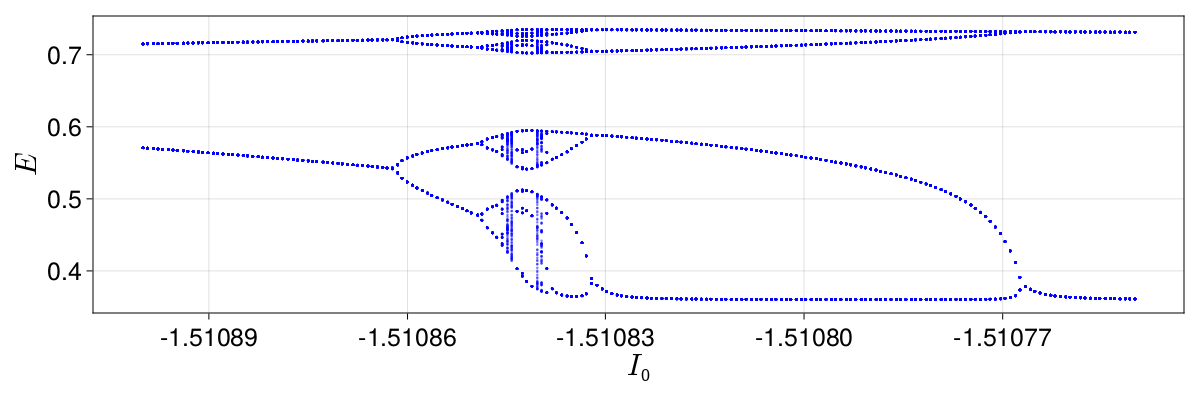

In [19]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("blue", 0.5), markersize = 2.5)
end
f